In [7]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as linalg
from matplotlib.animation import FFMpegWriter
from mpl_toolkits.mplot3d import Axes3D


In [8]:
G = 6.67 * (10 ** (-11))
M_black = 3e31   



#defining our cloud:
def spherical_cloud(num_points, radius_max):
    '''
    num_points is how many points in the cloud
    radius_max is maximum radius of the cloud
    '''
    points = np.zeros((num_points, 3)) #empty list with length of num_points each wiht an x, y, and z compoment
    for i in range(num_points):
        #spherical cordinates
        r = radius_max * np.cbrt(np.random.rand()) #randomly picks radius values equally weighted to be in the outer or inner regions of the sphere
        phi = 2 * np.pi * np.random.rand() #makes uniform in volume again
        theta = np.arccos(2 * np.random.rand() - 1) #again makes uniform in volume
        #converting to xyz for plotting
        x = r * np.sin(theta) * np.cos(phi)
        y = r * np.sin(theta) * np.sin(phi)
        z = r * np.cos(theta)
        points[i] = x, y, z
    return points


class Object:
  def __init__(self, mass, position, velocity):
    self.mass = mass
    self.position = list(position) #should be a  (x, y, z) will work well with force function
    self.velocity = list(velocity)

 
  def force(self):
    x, y, z = self.position
    ri_mag = np.sqrt((x**2) + (y**2) + (z**2))
    fvector = []
    for coord in self.position:
      c2 = ((-G * M_black * self.mass)/(ri_mag ** 3)) * coord
      fvector.append(c2)
    return np.array(fvector)

  def move(self, dt):
    ax, ay, az = self.force() / self.mass
    self.velocity[0] += ax * dt #updating velocity in x direction based on acceleration in x direction
    self.velocity[1] += ay * dt
    self.velocity[2] += az * dt
    self.position[0] += self.velocity[0] * dt #updating position based on updated velocity and change in time
    self.position[1] += self.velocity[1] * dt
    self.position[2] += self.velocity[2] * dt



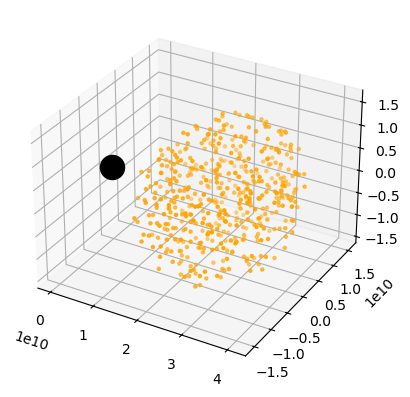

In [11]:
'''
This cell genrates a 'star' cloud, used to test parameters to make an ideal star
These parameters are NOT the same as our final simulation, and those can be viewed in our final simulation cell
This cell was used to first model our star and then on for testing purposes only

'''
orbital_radius = 2.55e10  # meters
orbital_speed = 3.306e5 #m/s
star_particle_mass = 1.1536e29 #kg

num_points = 500 #number
star_radius = 1.5932e10
positions = spherical_cloud(num_points, star_radius) #positions of our particles are randomly generated in a spherical cloud
velocities = np.zeros_like(positions) #velocity vectors each at 0 with total length of the number of particles
masses = np.ones(num_points)

#generating position, velocity, and mass data for each particle as an object in our class
objects = []
for pos in positions:
    objects.append(Object(mass=star_particle_mass, 
                          position=pos + np.array([orbital_radius, 0, 0]), 
                          velocity=(0,orbital_speed,0)))

#basic loop to move particles, few steps as we are only outputting the last step anyway
dt = 1e-2
steps1 = 3

xp = []
yp = []
zp = []
for i in range(steps1):
    for j in objects:
        j.move(dt)
        xp = [p.position[0] for p in objects]
        yp = [p.position[1] for p in objects]
        zp = [p.position[2] for p in objects]
        
ax = plt.axes(111, projection='3d')

ax.scatter(0,0,0, s=300, color='black')
ax.scatter(xp, yp, zp, s=5, color='orange')


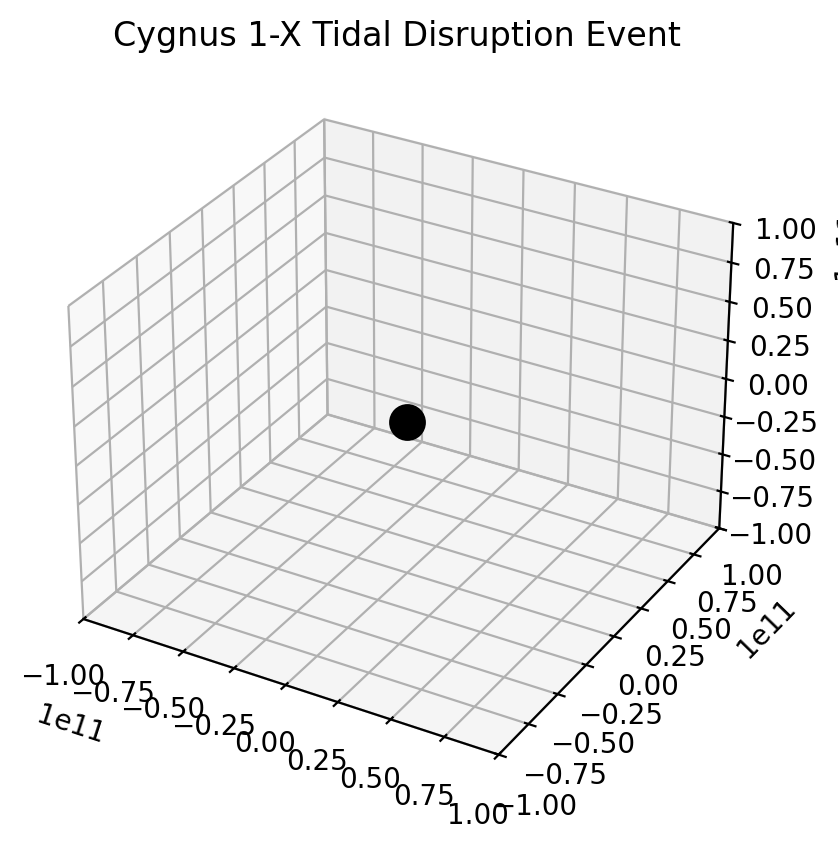

In [6]:
'''
Final Simulation:
This cell creates our animation with 300 particles, a time step of 2800 seconds, and 800 frames.
This takes my jupyter around 2 minutes to run.

'''

orbital_radius = 6.55e10  # meters
orbital_speed = 3.306e5 #m/s
star_particle_mass = 1.1536e29 #mass of single particle, equal to mass of Cygnus 1-x star divided by 300

num_points = 300
star_radius = 1.5932e10
positions = spherical_cloud(num_points, star_radius)
velocities = np.zeros_like(positions)
masses = np.ones(num_points)
#defining objects
objects = []
for pos in positions:
    objects.append(Object(mass=star_particle_mass, position=pos + np.array([orbital_radius, 0, 0]), velocity=(0,0,0)))

#predefining lists for positions, not sure if necessary but seems to help everything run
xp = []
yp = []
zp = []

dt = 2800 #seconds
steps = 800 #total animation steps

fig = plt.figure(dpi=200)
ax = fig.add_subplot(111, projection='3d')
metadata = dict(title='Cloud Tidal Simulation', artist='Matplotlib')
writer = FFMpegWriter(fps=15, metadata=metadata, bitrate=2000)

with writer.saving(fig, "cloud_simulation_cygnus1.mp4", dpi=200):
    for i in range(steps):
        # Move all particles
        for j in objects:
            j.move(dt)
        xp = [p.position[0] for p in objects]
        yp = [p.position[1] for p in objects]
        zp = [p.position[2] for p in objects]
 
        # Plot black hole and particles
        ax.cla()
        ax.scatter(0, 0, 0, color='black', s=150, label='Black Hole')
        ax.scatter(xp, yp, zp, s=5, color='orange')
        ax.set_xlim(-1e11, 1e11)
        ax.set_ylim(-1e11, 1e11)
        ax.set_zlim(-1e11, 1e11)
        ax.set_title('Cygnus 1-X Tidal Disruption Event')
    
        plt.draw()
        writer.grab_frame()